In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')
color_pal=sns.color_palette()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
ep =pd.read_csv('/content/Electric_Production.csv')

In [12]:
ep.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [13]:
ep.tail()

,DATE,IPG2211A2N
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212
396,1/1/2018,129.4048


In [14]:
ep.shape

(397, 2)

In [15]:
ep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [16]:
ep.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [17]:
ep.isna().sum()

,0
DATE,0
IPG2211A2N,0


In [18]:
ep.duplicated().sum()

0

In [19]:
ep.sample()

,DATE,IPG2211A2N
60,1/1/1990,84.3598


In [24]:
ep.set_index('DATE')

,IPG2211A2N
DATE,
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151
...,...
9/1/2017,98.6154
10/1/2017,93.6137
11/1/2017,97.3359


In [25]:
ep=ep.set_index('DATE')

<Axes: xlabel='DATE'>

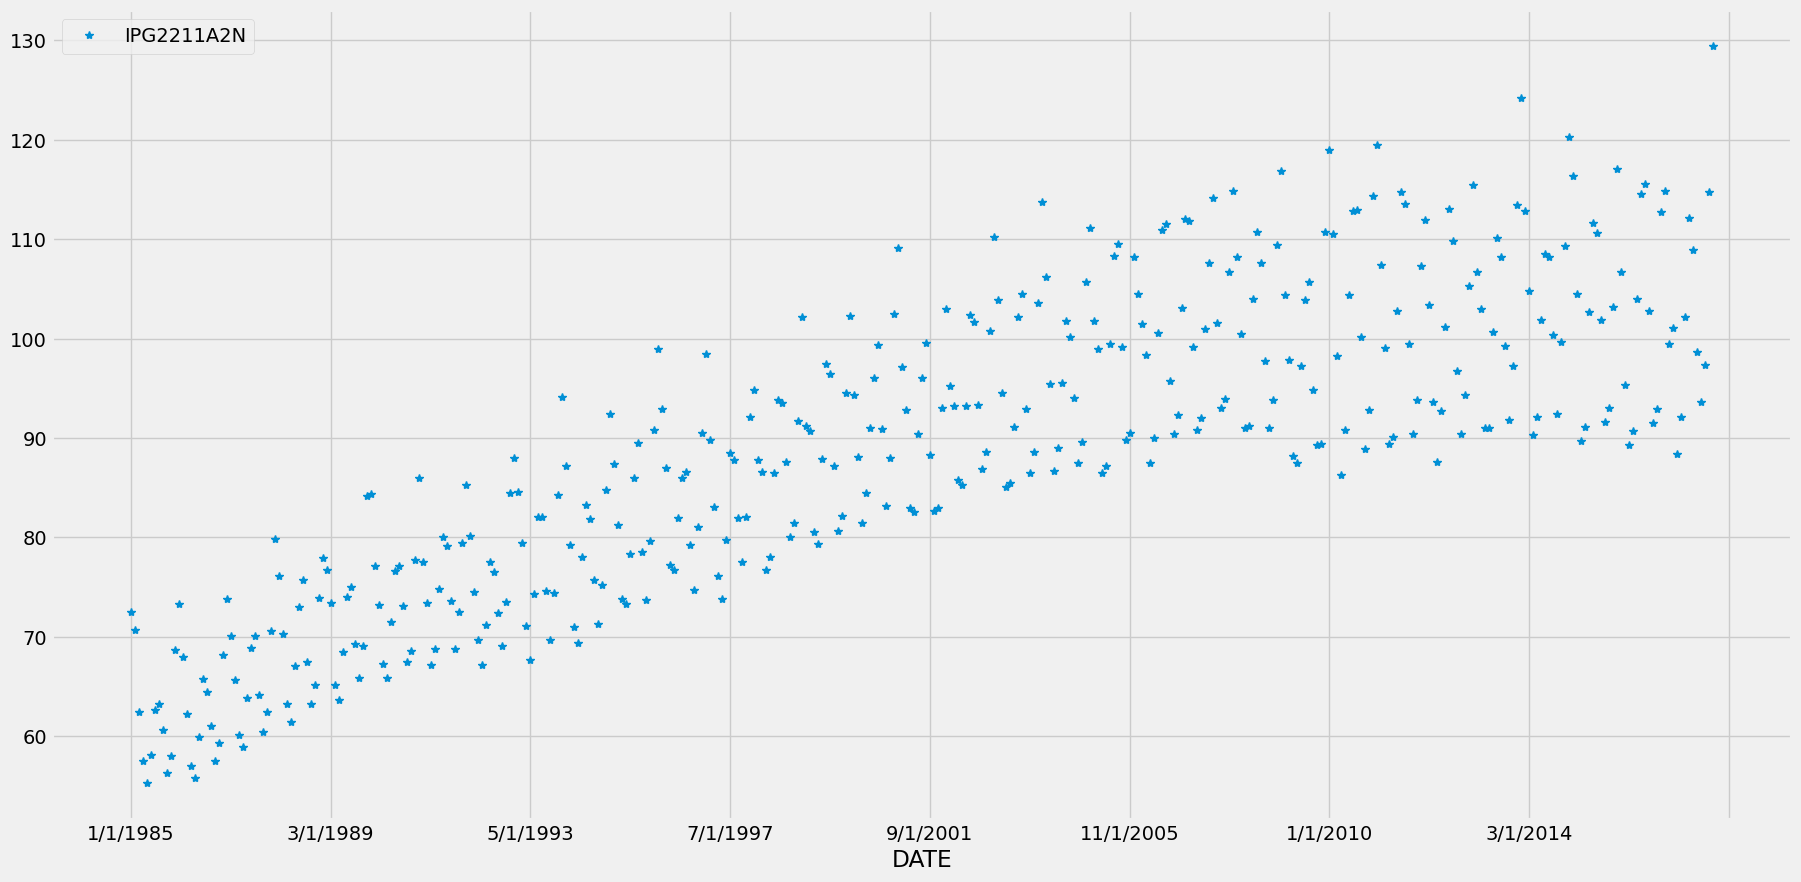

In [26]:
ep.plot(figsize=(20,10),style='*')

In [29]:
pd.to_datetime(ep.index)

DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01'],
              dtype='datetime64[ns]', name='DATE', length=397, freq=None)

In [30]:
ep.index=pd.to_datetime(ep.index)

In [32]:
ep.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


<Axes: xlabel='DATE'>

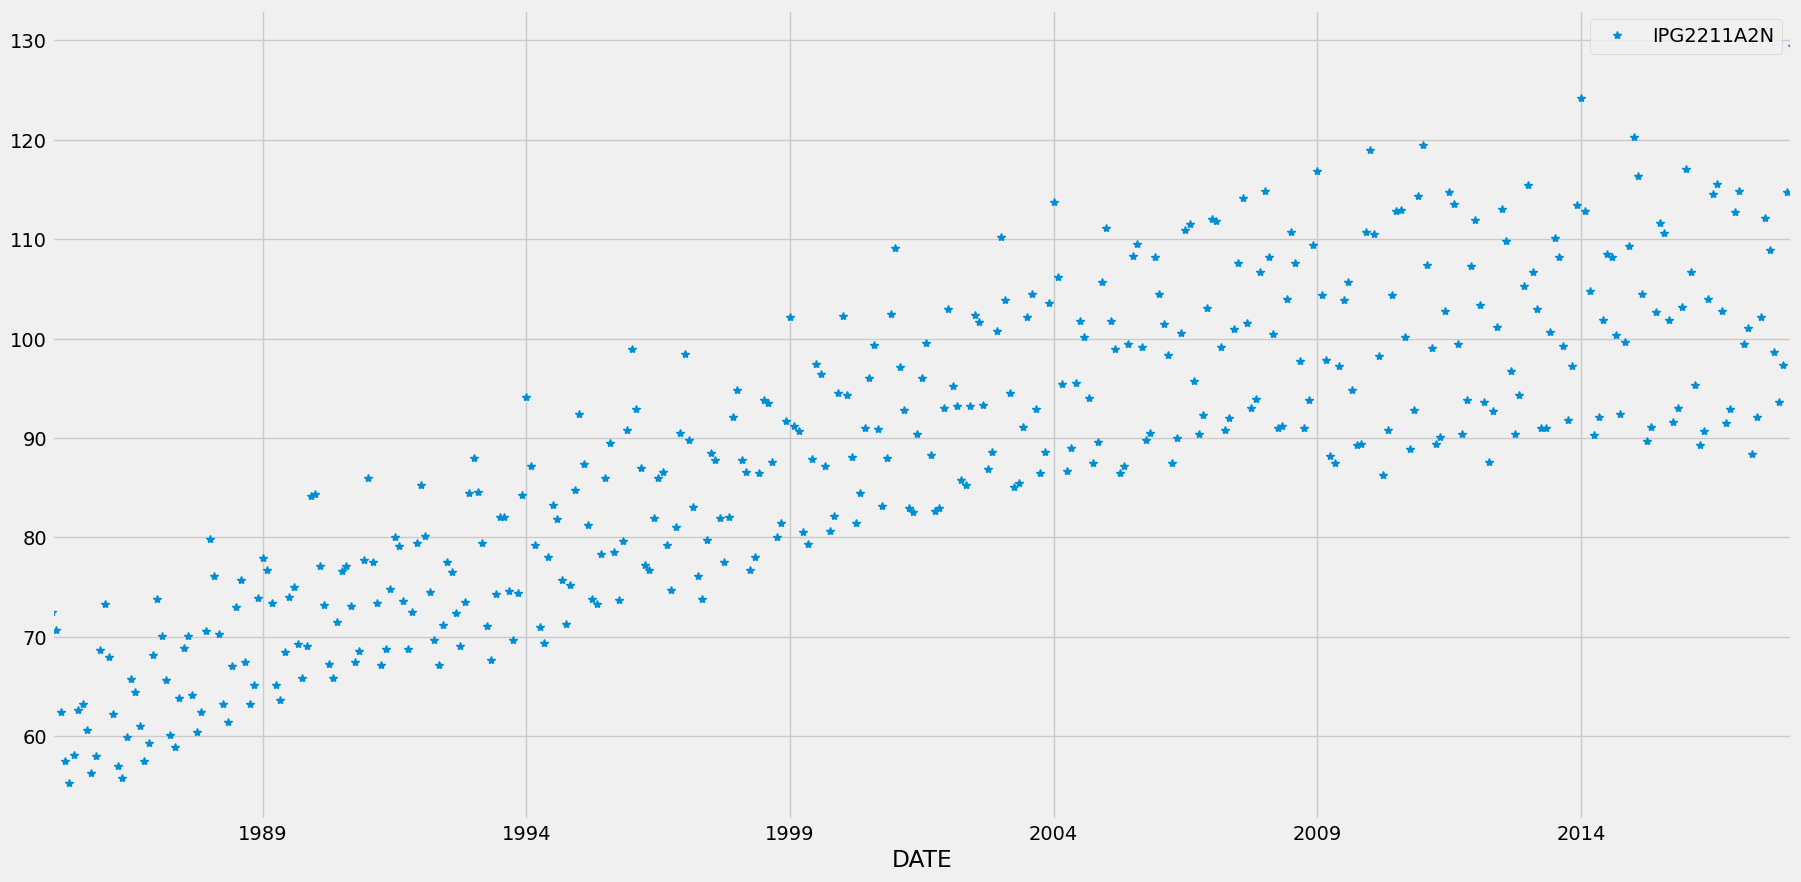

In [33]:
ep.plot(figsize=(20,10),style='*')

In [36]:
ep['dayofweek']=ep.index.dayofweek
ep['month']=ep.index.month
ep['quarter']=ep.index.quarter
ep['year']=ep.index.year
ep['dayofyear']=ep.index.dayofyear

In [38]:
ep.head()

,IPG2211A2N,hour,dayofweek,month,quarter,year,dayofyear
DATE,,,,,,,
1985-01-01,72.5052,0,1,1,1,1985,1
1985-02-01,70.6720,0,4,2,1,1985,32
1985-03-01,62.4502,0,4,3,1,1985,60
1985-04-01,57.4714,0,0,4,2,1985,91
1985-05-01,55.3151,0,2,5,2,1985,121


<Axes: xlabel='hour', ylabel='IPG2211A2N'>

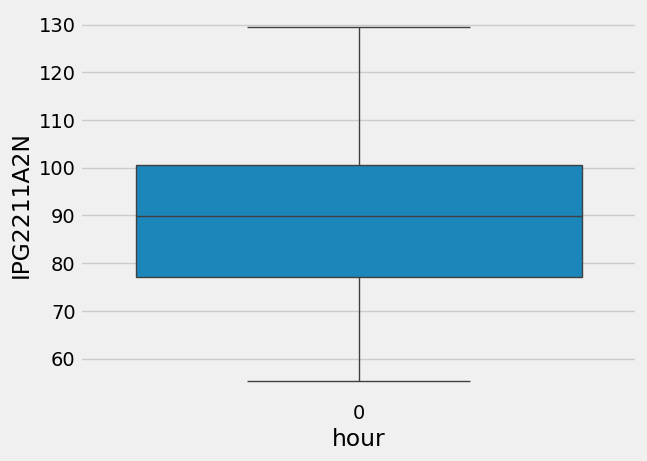

In [41]:
sns.boxplot(data=ep, x='hour', y='IPG2211A2N')

<Axes: xlabel='month', ylabel='IPG2211A2N'>

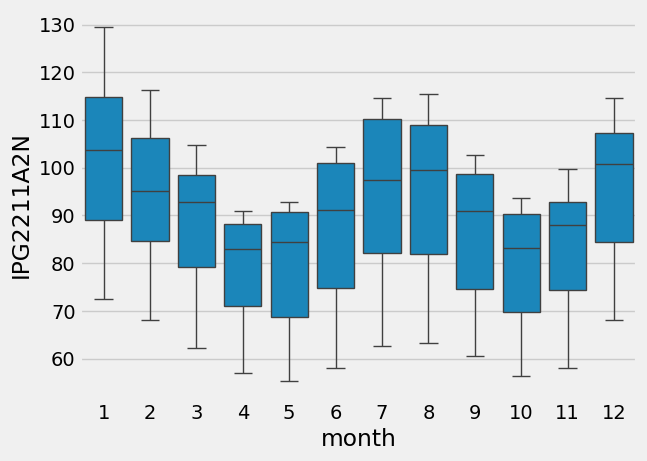

In [42]:
sns.boxplot(data=ep,x='month',y='IPG2211A2N')

<Axes: xlabel='year', ylabel='IPG2211A2N'>

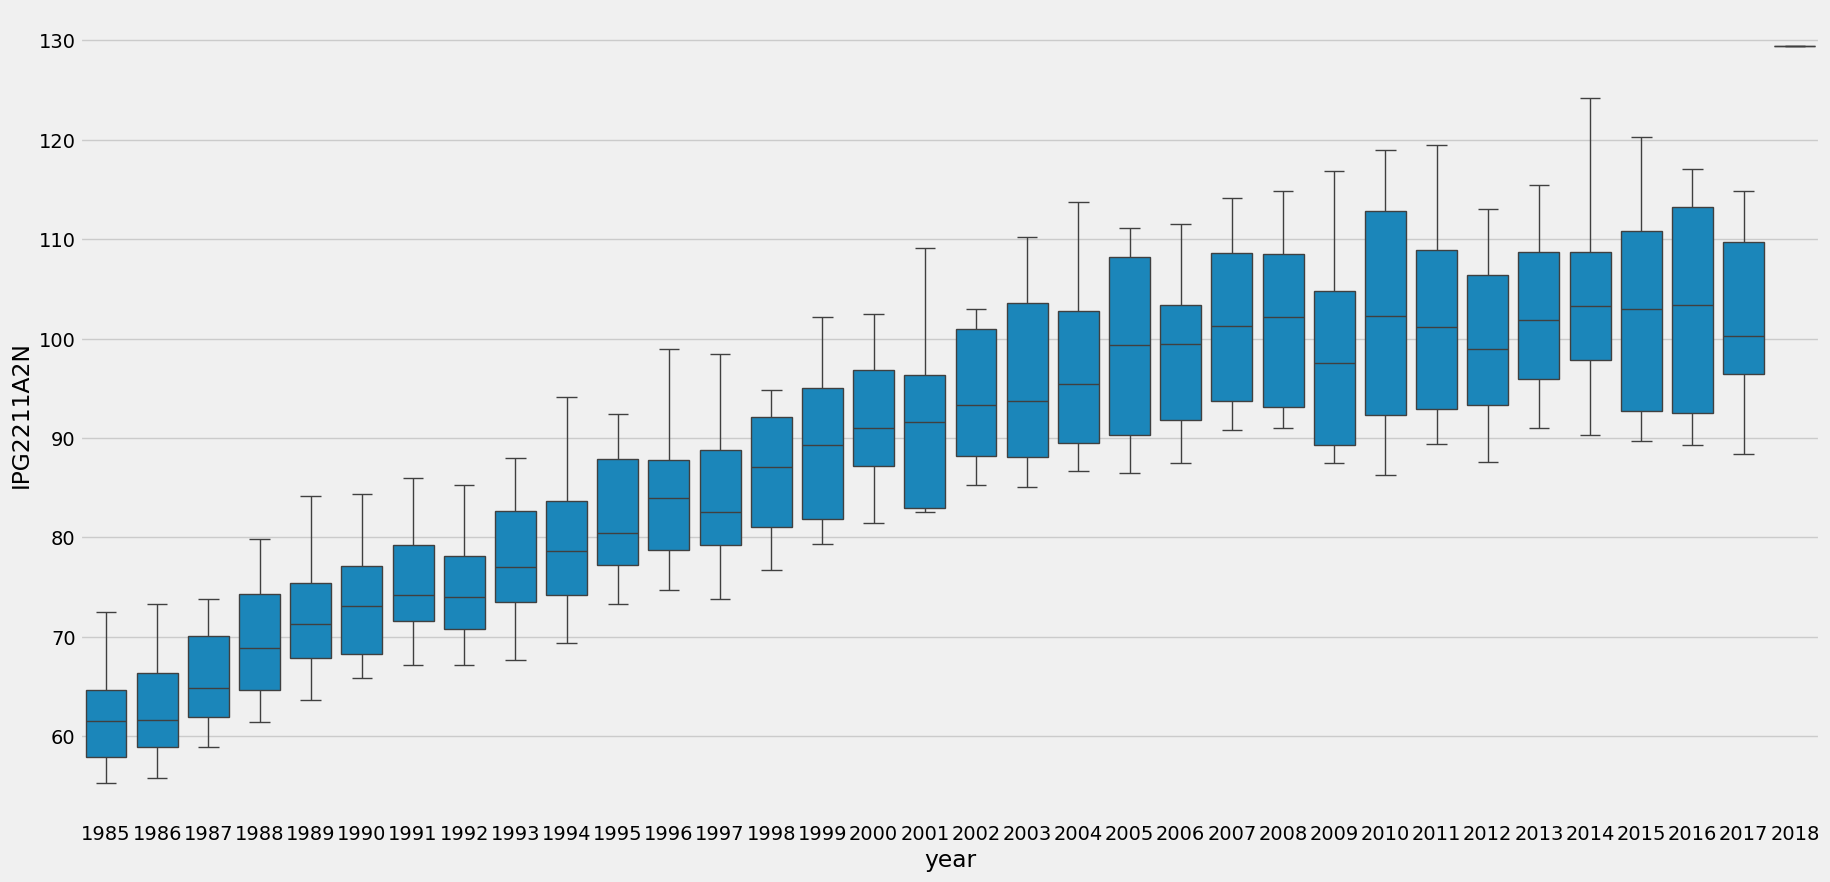

In [43]:
plt.figure(figsize=(20,10))
sns.boxplot(data=ep,x='year',y='IPG2211A2N')

<Axes: xlabel='quarter', ylabel='IPG2211A2N'>

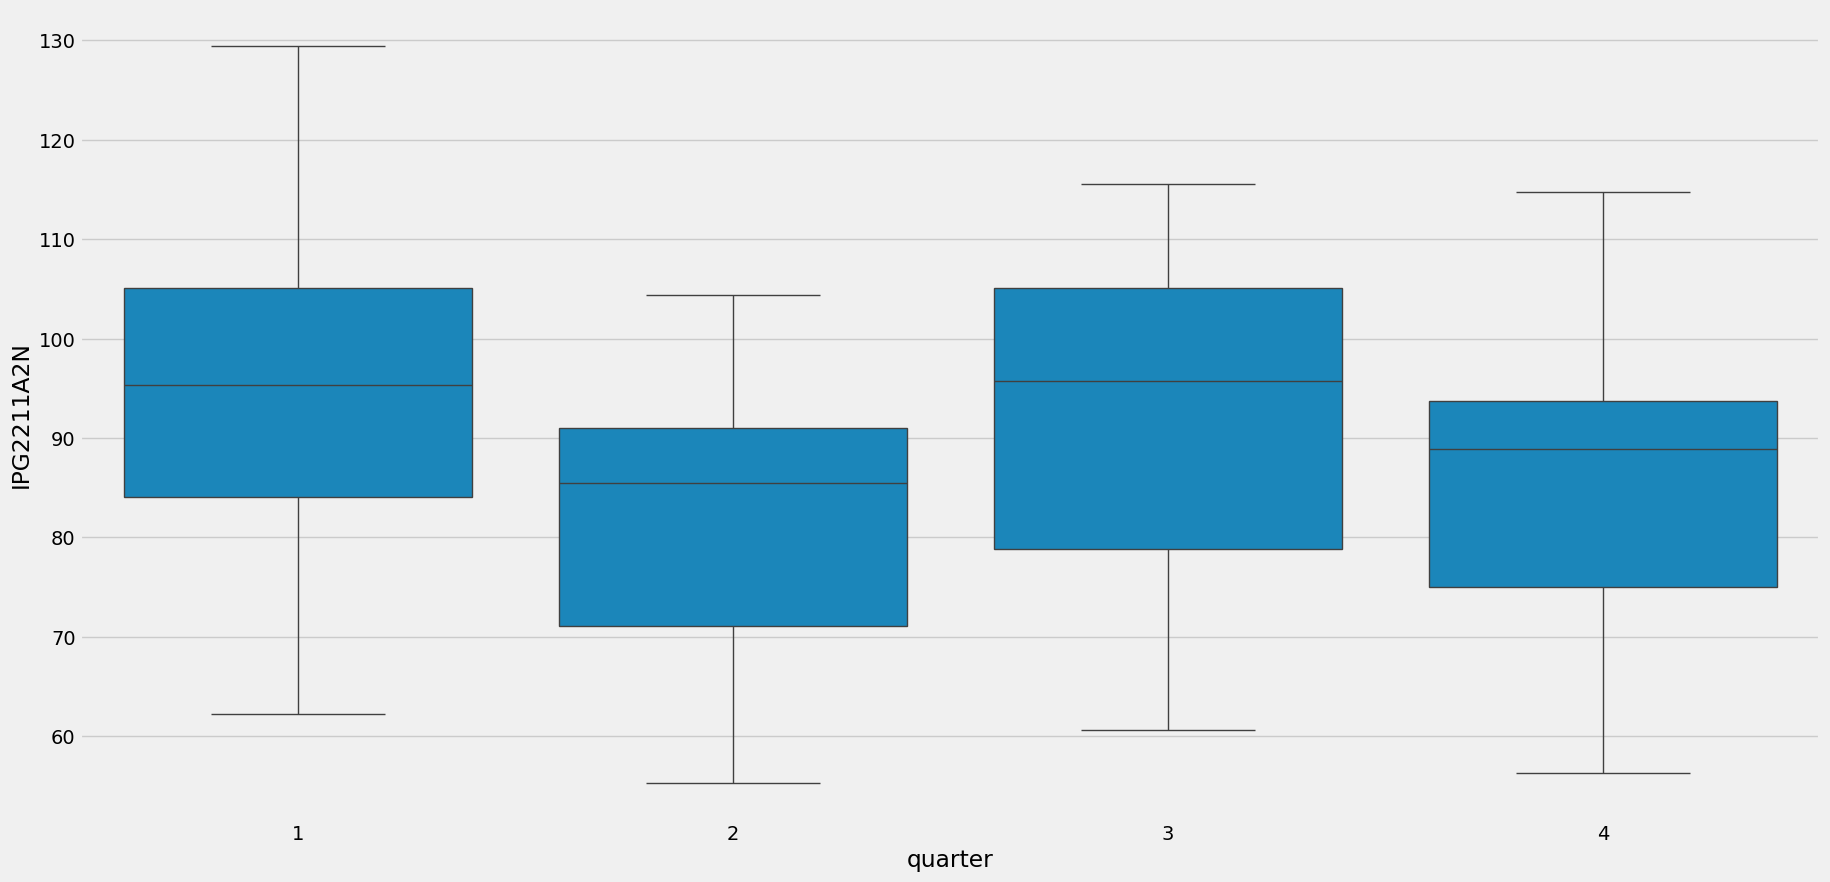

In [44]:
plt.figure(figsize=(20,10))
sns.boxplot(data=ep,x='quarter',y='IPG2211A2N')

<Axes: xlabel='dayofweek', ylabel='IPG2211A2N'>

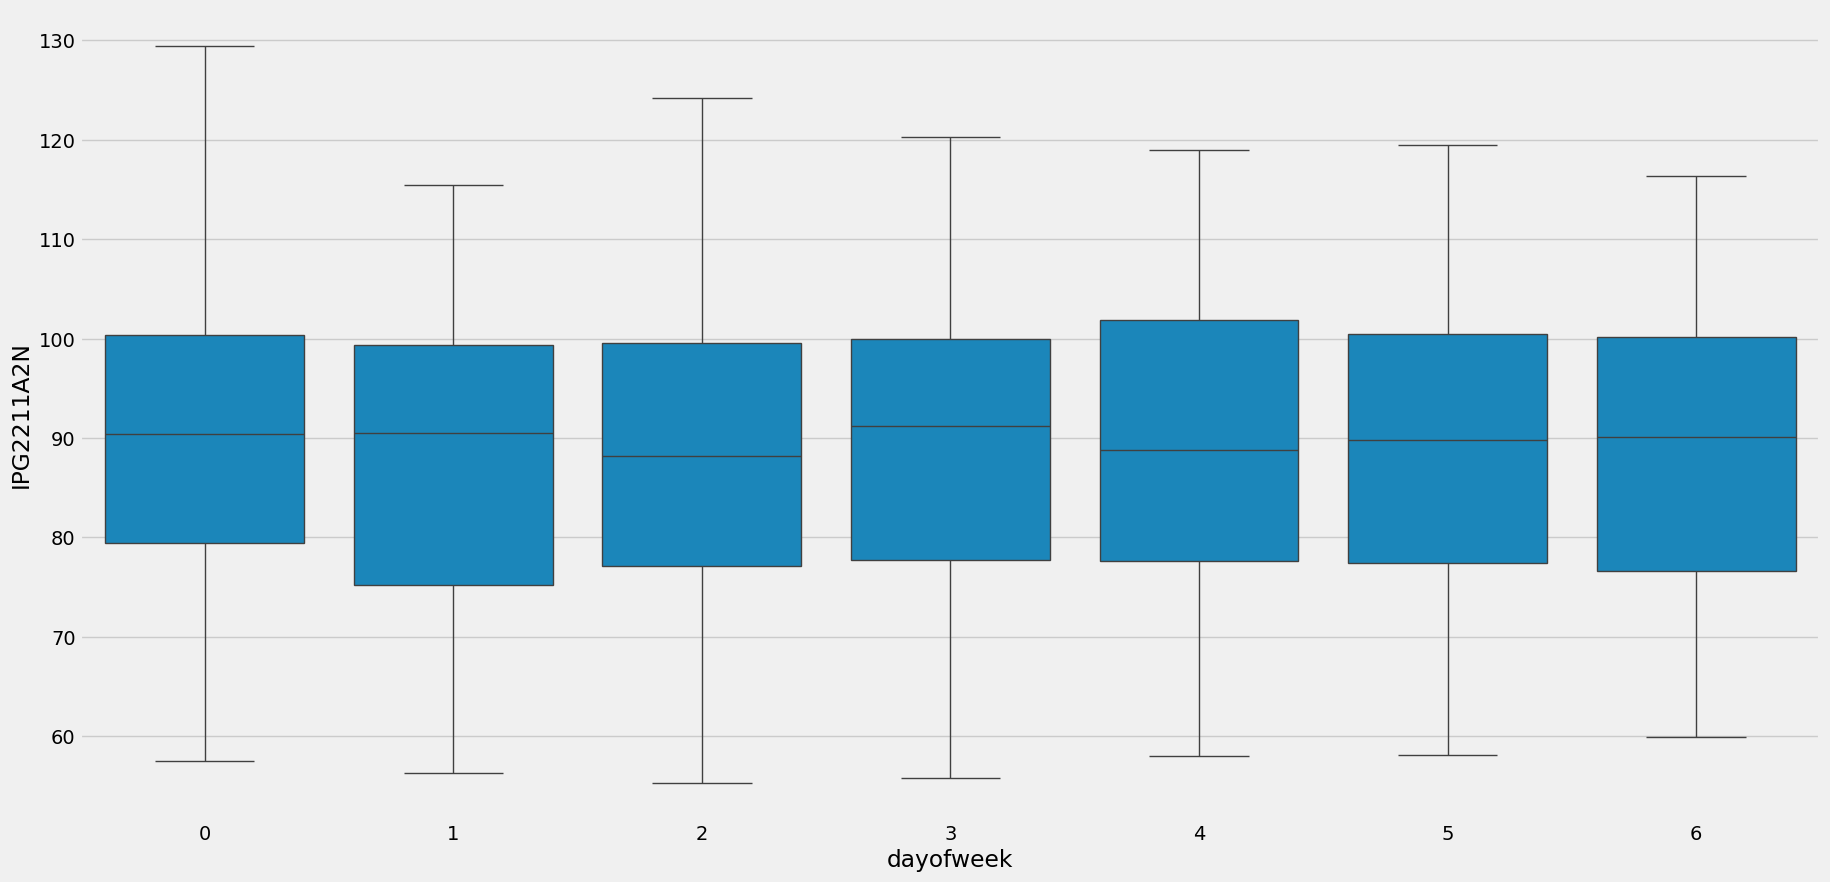

In [45]:
plt.figure(figsize=(20,10))
sns.boxplot(data=ep,x='dayofweek',y='IPG2211A2N')

In [47]:
train_time=ep.loc[ep.index<'01-01-2014']
test_time=ep.loc[ep.index>='01-01-2014']

<Axes: xlabel='DATE'>

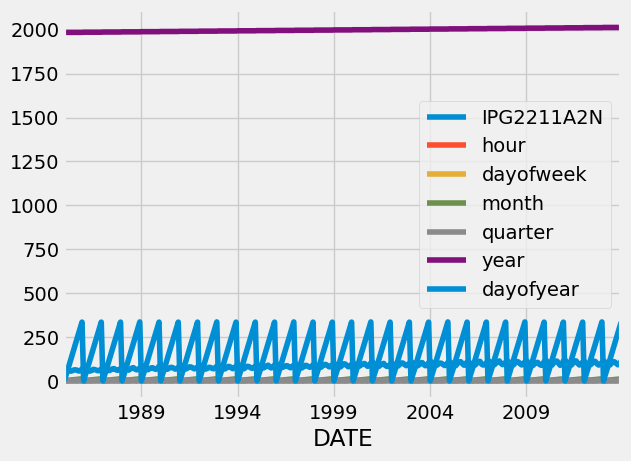

In [48]:
train_time.plot()

<Axes: xlabel='DATE'>

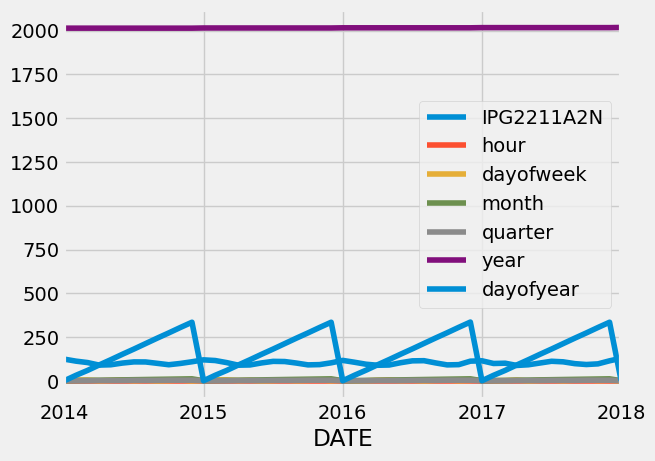

In [49]:
test_time.plot()

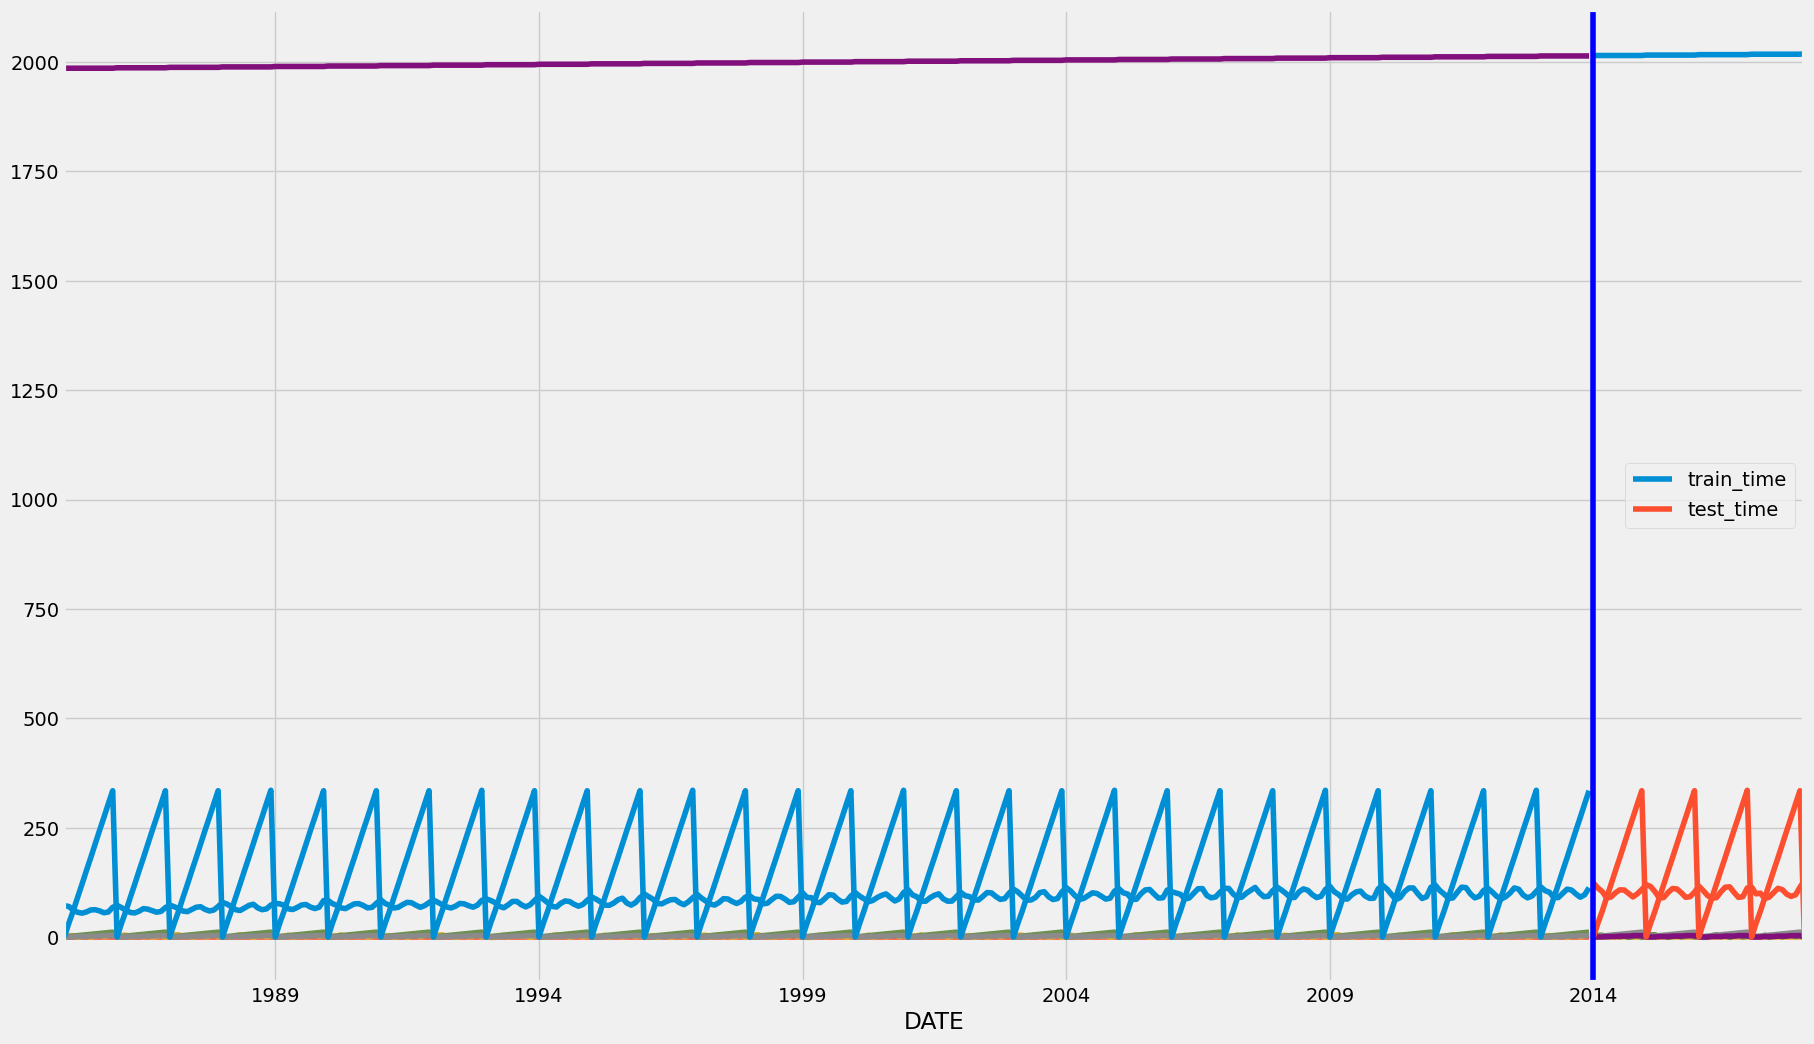

In [50]:
fig,ax=plt.subplots(figsize=(20,12))
train_time.plot(ax=ax)
test_time.plot(ax=ax)
ax.axvline('01-01-2014',color='blue')
plt.legend(['train_time','test_time'])

In [51]:
x_train=train_time.drop('IPG2211A2N',axis=1)
y_train=train_time['IPG2211A2N']

x_test=test_time.drop('IPG2211A2N',axis=1)
y_test=test_time['IPG2211A2N']

In [52]:
x_test

,hour,dayofweek,month,quarter,year,dayofyear
DATE,,,,,,
2014-01-01,0,2,1,1,2014,1
2014-02-01,0,5,2,1,2014,32
2014-03-01,0,5,3,1,2014,60
2014-04-01,0,1,4,2,2014,91
2014-05-01,0,3,5,2,2014,121
2014-06-01,0,6,6,2,2014,152
2014-07-01,0,1,7,3,2014,182
2014-08-01,0,4,8,3,2014,213
2014-09-01,0,0,9,3,2014,244


In [53]:
y_test

,IPG2211A2N
DATE,
2014-01-01,124.2549
2014-02-01,112.8811
2014-03-01,104.7631
2014-04-01,90.2867
2014-05-01,92.1340
2014-06-01,101.8780
2014-07-01,108.5497
2014-08-01,108.1940
2014-09-01,100.4172


In [54]:
Model=XGBRegressor(n_estimator=1000,early_stopping_round=60)

In [55]:
Model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_round=60,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimator=1000,
             n_estimators=None, n_jobs=None, ...)

In [56]:
Model.score(x_train,y_train)

0.9999867656169684

In [57]:
testing=Model.predict(x_test)

In [58]:
mean_squared_error(testing,y_test)

17.055808074992292